# Lab 09

<a href="https://www.youtube.com/watch?v=AwmKihv0BgU">Sunshine of your love</a>

In [1]:
%matplotlib inline
import sys
sys.path.append('../SoundSyn')
sys.path.append('../Thinkdsp')
import soundSyn
import thinkdsp

import numpy as np
import matplotlib.pyplot as plt

## Overdrive

<a href="https://youtu.be/fregObNcHC88">Example</a>

In [2]:
def overdrive(waveIn, threshold):  # 0 < threshold < 0.5
    waveOut = waveIn.copy()
    for i in range(len(waveOut.ys)):
        if (abs(waveIn.ys[i]) < threshold):
            waveOut.ys[i] = waveIn.ys[i] 
        else: 
            if (waveIn.ys[i] > 0):
                waveOut.ys[i] = threshold
            else:
                waveOut.ys[i] = -threshold
    waveOut.normalize()            
    return waveOut

### Sine wave

In [3]:
waveSin = thinkdsp.sin_wave(220,3)
waveSin.make_audio()

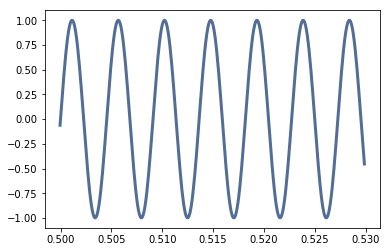

In [4]:
seg = waveSin.segment(0.5, 0.03)
seg.plot()

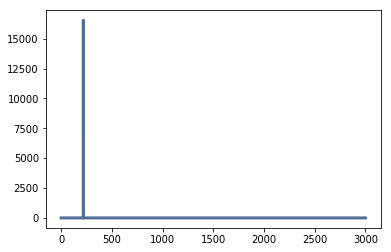

In [5]:
sp = waveSin.make_spectrum()
sp.plot(high=3000)

In [6]:
t = 0.2
waveOD = overdrive(waveSin, t)
waveOD.make_audio()

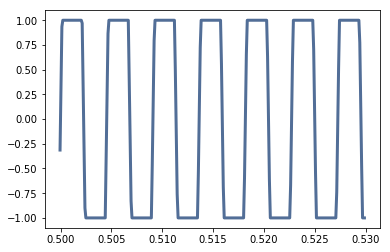

In [7]:
seg = waveOD.segment(0.5, 0.03)
seg.plot()

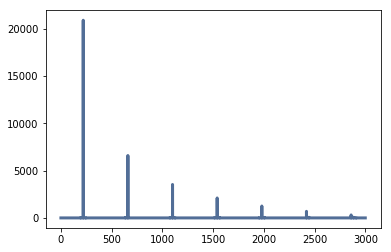

In [8]:
sp = waveOD.make_spectrum()
sp.plot(high=3000)

### Synthesis sound

In [9]:
ssET = soundSyn.SoundSyn()
ssET.set_partial([1,0.8,0.7,0.9,0.5,0.7,0.5,0.5])  # guitar ??
ssET.set_file("sunshine.txt")
waveSun = ssET.make_wave()
waveSun.make_audio()

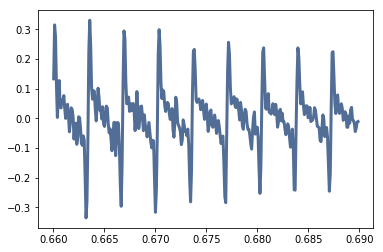

In [10]:
seg = waveSun.segment(0.66,0.03)
seg.plot()

In [11]:
waveSunOD = overdrive(waveSun,t)
waveSunOD.make_audio()

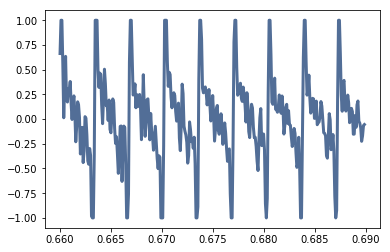

In [12]:
seg = waveSunOD.segment(0.66,0.03)
seg.plot()

# Wah Wah

<a href="https://youtu.be/IZBlqcbpmxY">Example</a>

In [13]:
def wahwah(waveIn, damp, minf, maxf, fw):
    waveOut = waveIn.copy()
    fs = waveIn.framerate
    q1 = 2 * damp
    fc = minf
    f1 = 2 * np.sin((np.pi * fc)/fs)
    waveOut.ys[0] = f1 * waveIn.ys[0]
    yl = f1 * waveOut.ys[0]
    yaux = waveOut.ys[0]
    delta = fw/fs
    for i in range(1,len(waveIn.ys)):
        if ((fc + delta > maxf) or (fc + delta < minf)):
            delta = -delta
        fc = fc + delta
        f1 = 2 * np.sin((np.pi * fc)/fs)
        yh = waveIn.ys[i] - yl - q1 * yaux
        waveOut.ys[i] = f1 * yh + yaux
        yl = f1 * waveOut.ys[i] + yl
        yaux = waveOut.ys[i]
        
    maxy = max(abs(waveOut.ys))
    waveOut.ys = waveOut.ys / maxy
    return waveOut

### Sine wave

In [14]:
waveWah = wahwah(waveSin, 0.05, 500, 3000, 12000)
waveWah.make_audio()

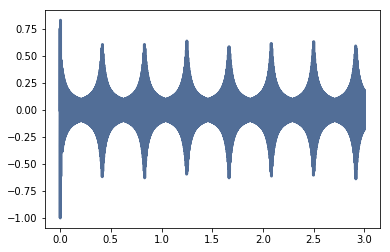

In [15]:
waveWah.plot()

### Synthesis sound

In [16]:
waveSunWah = wahwah(waveSun, 0.05, 500, 3000, 25000)
waveSunWah.make_audio()

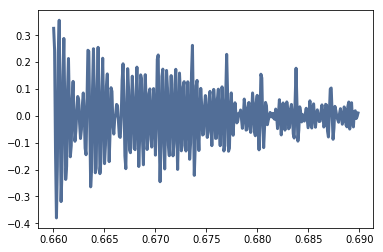

In [17]:
seg = waveSunWah.segment(0.66,0.03)
seg.plot()

## Tremolo

<a href="https://youtu.be/ezJY_qqz_x8">Example</a>

In [18]:
def tremolo(waveIn, fm):
    waveOut = waveIn.copy()
    fs = waveIn.framerate
    alpha = 0.5
    for i in range(0, len(waveIn.ys)):
        waveOut.ys[i] = waveIn.ys[i] * (1 + alpha * np.sin(2 * np.pi * i * fm/fs))
    waveOut.normalize()
    return waveOut

### Sine wave

In [19]:
f = 10
waveTrem = tremolo(waveSin, f)
waveTrem.make_audio()

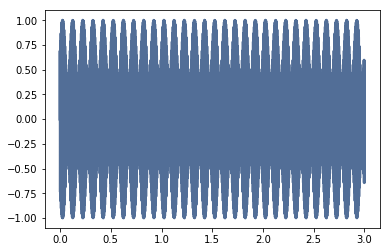

In [20]:
waveTrem.plot()

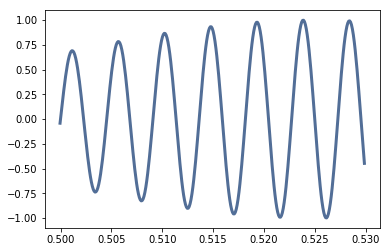

In [21]:
seg = waveTrem.segment(0.5, 0.03)
seg.plot()

### Synthesis sound

In [22]:
waveSunTrem = tremolo(waveSun, f)
waveSunTrem.make_audio()

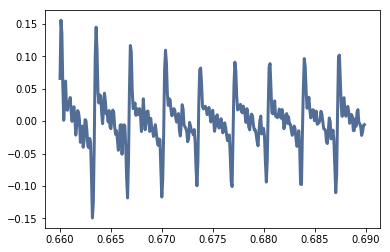

In [23]:
seg = waveSunTrem.segment(0.66,0.03)
seg.plot()

## Delay

<a href="https://youtu.be/0tLsFsGxLmE">Example</a>

In [24]:
def delay(waveIn, delay):
    waveOut = waveIn.copy()
    fs = waveIn.framerate
    amp = 0.7
    sampDelay = round(delay * fs)
    for i in range(0, sampDelay):
        waveOut.ys[i] = waveIn.ys[i]
    for i in range(sampDelay, len(waveIn.ys)):
        waveOut.ys[i] = (amp * waveIn.ys[i]) + (1-amp) * waveIn.ys[i - sampDelay]
    waveOut.normalize()
    return waveOut

### Sine wave

In [25]:
d = 0.3
waveDelay = delay(waveSin, d)
waveDelay.make_audio()

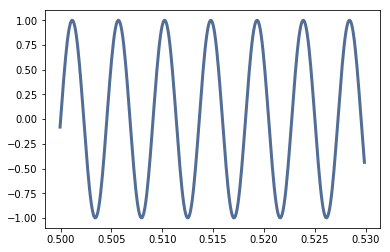

In [26]:
seg = waveDelay.segment(0.5, 0.03)
seg.plot()

### Synthesis sound

In [27]:
waveSunDelay = delay(waveSun, d)
waveSunDelay.make_audio()

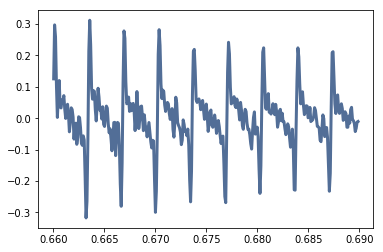

In [28]:
seg = waveSunDelay.segment(0.66,0.03)
seg.plot()